# Training a machine learning model with scikit-learn

Based on code combined from created by [Data School](http://www.dataschool.io/). Watch all 9 videos on [YouTube](https://www.youtube.com/playlist?list=PL5-da3qGB5ICeMbQuqbbCOQWcS6OYBr5A). Download the notebooks from [GitHub](https://github.com/justmarkham/scikit-learn-videos).

**Note:** This notebook uses Python 3.6 and scikit-learn 0.19.1. The original notebook (shown in the video) used Python 2.7 and scikit-learn 0.16, and can be downloaded from the [archive branch](https://github.com/justmarkham/scikit-learn-videos/tree/archive).

## Agenda

- What are the four steps for **model training and prediction** in scikit-learn?
- How can I apply this pattern to **various machine learning models**?
- How can I evaluate **which model is better**?

## Reviewing the iris dataset

In [1]:
from IPython.display import IFrame
IFrame('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', width=300, height=200)

- 150 **observations**
- 4 **features** (sepal length, sepal width, petal length, petal width)
- **Response** variable is the iris species
- **Classification** problem since response is categorical
- More information in the [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets/Iris)

## Loading the data

In [2]:
# import load_iris function from datasets module
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# save "bunch" object containing iris dataset and its attributes
iris = load_iris()

# store feature matrix in "X"
X = iris.data

# store response vector in "y"
y = iris.target

# use train/test split with different random_state values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)

In [3]:
# print the shapes of X and y
print(X.shape)
print(y.shape)

(150, 4)
(150,)


## scikit-learn 4-step modeling pattern

We will take a look at the 4 main steps using the k-nearest neighbors classifier

**Step 1:** Import the class you plan to use

In [4]:
from sklearn.neighbors import KNeighborsClassifier

**Step 2:** "Instantiate" the "estimator"

- "Estimator" is scikit-learn's term for model
- "Instantiate" means "make an instance of"

In [5]:
knn = KNeighborsClassifier(n_neighbors=1)

- Name of the object does not matter
- Can specify tuning parameters (aka "hyperparameters") during this step
- All parameters not specified are set to their defaults

In [6]:
print(knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')


**Step 3:** Fit the model with data (aka "model training")

- Model is learning the relationship between X and y
- Occurs in-place

In [7]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

**Step 4:** Predict the response for a new observation

- New observations are called "out-of-sample" data
- Uses the information it learned during the model training process

In [8]:
knn.predict([[3, 5, 4, 2]])

array([2])

- Returns a NumPy array
- Can predict for multiple observations at once

In [9]:
X_new = [[3, 5, 4, 2], [5, 4, 3, 2]]
knn.predict(X_new)

array([2, 1])

## Evalutating the different models

In [10]:
# evaluate the model using cross-validation
from sklearn.model_selection import cross_val_score
cross_val_score(knn, X_train, y_train, cv=3, scoring="accuracy")

array([0.94736842, 0.94736842, 1.        ])

In [11]:
# evaluate the model using confustion matrix 
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
import matplotlib as mpl
import matplotlib.pyplot as plt

y_train_pred = cross_val_predict(knn, X_train, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
print(conf_mx)
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

[[32  0  0]
 [ 0 40  2]
 [ 0  2 36]]


<Figure size 480x480 with 1 Axes>

In [12]:
#  evaluate using precision, recall, and f1 score
from sklearn.metrics import precision_score, recall_score, f1_score

prec = precision_score(y_train, y_train_pred, average=None)
rec = recall_score(y_train, y_train_pred, average=None)
f1 = f1_score(y_train, y_train_pred, average=None)

print("\t\t  class 1\tclass 2\t class 3")
print("precision: \t", prec)
print("recall: \t", rec)
print("f1_score: \t", f1)


		  class 1	class 2	 class 3
precision: 	 [1.         0.95238095 0.94736842]
recall: 	 [1.         0.95238095 0.94736842]
f1_score: 	 [1.         0.95238095 0.94736842]


## Using a different value for K

In [13]:
# instantiate the model (using the value K=5)
knn = KNeighborsClassifier(n_neighbors=5)

# fit the model with data
knn.fit(X_train, y_train)

# predict the response for new observations
knn.predict(X_new)

array([1, 1])

cross_val: [0.97368421 0.94736842 1.        ]
confusion matrix:
 [[32  0  0]
 [ 0 40  2]
 [ 0  1 37]]


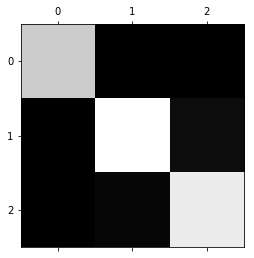

		  class 1	class 2	 class 3
precision: 	 [1.         0.97560976 0.94871795]
recall: 	 [1.         0.95238095 0.97368421]
f1_score: 	 [1.         0.96385542 0.96103896]


In [14]:
# evaluate the new model:
cross_val = cross_val_score(knn, X_train, y_train, cv=3, scoring="accuracy")
print("cross_val:", cross_val)


y_train_pred = cross_val_predict(knn, X_train, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
print("confusion matrix:\n", conf_mx)
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

prec = precision_score(y_train, y_train_pred, average=None)
rec = recall_score(y_train, y_train_pred, average=None)
f1 = f1_score(y_train, y_train_pred, average=None)

print("\t\t  class 1\tclass 2\t class 3")
print("precision: \t", prec)
print("recall: \t", rec)
print("f1_score: \t", f1)


**QUESTION:** Based on the above evaluation for the two knn models, k=1 and k=5, which model performed better and why?

**ANSWER:** INSERT YOUR ANSWER HERE!!!!!! 

## Using a different classification model

Now, pick three of the different classification models we discussed in class last time, and follow the same classification and evaluation procedures as above.

In [15]:
# ANSWER: FIRST NEW CLASSIFICATION MODEL 
#         - fill in the ???? with your chosen classifier!!!

# import the class
from sklearn.???? import ????

# instantiate the model (using the default parameters)
???? = ????()

# fit the model with data
????.fit(X_train, y_train)

# predict the response for new observations
pred = ????.predict(X_new)
print("Prediction for our new observation X_new: ", pred)

# evaluate the new model:
cross_val = cross_val_score(????, X_train, y_train, cv=3, scoring="accuracy")
print("cross_val:", cross_val)

y_train_pred = cross_val_predict(????, X_train, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
print("confusion matrix:\n", conf_mx)
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

prec = precision_score(y_train, y_train_pred, average=None)
rec = recall_score(y_train, y_train_pred, average=None)
f1 = f1_score(y_train, y_train_pred, average=None)

print("\t\t  class 1\tclass 2\t class 3")
print("precision: \t", prec)
print("recall: \t", rec)
print("f1_score: \t", f1)


SyntaxError: invalid syntax (<ipython-input-15-9d028708837f>, line 5)

In [ ]:
# ANSWER: SECOND NEW CLASSIFICATION MODEL 
#         - fill in the ???? with your chosen classifier!!!

# import the class
from sklearn.???? import ????

# instantiate the model (using the default parameters)
???? = ????()

# fit the model with data
????.fit(X_train, y_train)

# predict the response for new observations
pred = ????.predict(X_new)
print("Prediction for our new observation X_new: ", pred)

# evaluate the new model:
cross_val = cross_val_score(????, X_train, y_train, cv=3, scoring="accuracy")
print("cross_val:", cross_val)

y_train_pred = cross_val_predict(????, X_train, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
print("confusion matrix:\n", conf_mx)
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

prec = precision_score(y_train, y_train_pred, average=None)
rec = recall_score(y_train, y_train_pred, average=None)
f1 = f1_score(y_train, y_train_pred, average=None)

print("\t\t  class 1\tclass 2\t class 3")
print("precision: \t", prec)
print("recall: \t", rec)
print("f1_score: \t", f1)


In [ ]:
# ANSWER: THIRD NEW CLASSIFICATION MODEL 
#         - fill in the ???? with your chosen classifier!!!

# import the class
from sklearn.???? import ????

# instantiate the model (using the default parameters)
???? = ????()

# fit the model with data
????.fit(X_train, y_train)

# predict the response for new observations
pred = ????.predict(X_new)
print("Prediction for our new observation X_new: ", pred)

# evaluate the new model:
cross_val = cross_val_score(????, X_train, y_train, cv=3, scoring="accuracy")
print("cross_val:", cross_val)

y_train_pred = cross_val_predict(????, X_train, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
print("confusion matrix:\n", conf_mx)
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

prec = precision_score(y_train, y_train_pred, average=None)
rec = recall_score(y_train, y_train_pred, average=None)
f1 = f1_score(y_train, y_train_pred, average=None)

print("\t\t  class 1\tclass 2\t class 3")
print("precision: \t", prec)
print("recall: \t", rec)
print("f1_score: \t", f1)


**QUESTION:** Based on the above evaluation for the two knn models and the three other models you generated, which model performed the best and why?

**ANSWER:** INSERT YOUR ANSWER HERE!!!!!! 

**QUESTION:** Rank the two knn models and your three other models in performance from best to worst. Explain your ranking

**ANSWER:** INSERT YOUR ANSWER HERE!!!!!! 